In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

На сегодняшний момент наиболее распространенным способом
представления категориальных переменных является прямое
кодирование или, если перевести дословно, кодирование с одним
горячим состоянием (one-hot-encoding или one-out-of-N encoding)

In [14]:
df = pd.read_csv('C:\\python\\titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [16]:
print("Исходные признаки:\n", list(df.columns), "\n")
df_dummies = pd.get_dummies(df)
print("Признаки после get_dummies:\n", list(df_dummies.columns))


Исходные признаки:
 ['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'] 

Признаки после get_dummies:
 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward', 'Name_Abbott, Mrs. Stanton (Rosa Hunt)', 'Name_Abelson, Mr. Samuel', 'Name_Abelson, Mrs. Samuel (Hannah Wizosky)', 'Name_Adahl, Mr. Mauritz Nils Martin', 'Name_Adams, Mr. John', 'Name_Ahlin, Mrs. Johan (Johanna Persdotter Larsson)', 'Name_Aks, Mrs. Sam (Leah Rosen)', 'Name_Albimona, Mr. Nassef Cassem', 'Name_Alexander, Mr. William', 'Name_Alhomaki, Mr. Ilmari Rudolf', 'Name_Ali, Mr. Ahmed', 'Name_Ali, Mr. William', 'Name_Allen, Miss. Elisabeth Walton', 'Name_Allen, Mr. William Henry', 'Name_Allison, Master. Hudson Trevor', 'Name_Allison, Miss. Helen Loraine', 'Name_Allison, Mrs. Hudson J C (Bessie Waldo Daniels)', 'Name_Allum, Mr. Owen George', 'Name_Andersen-Jensen, Miss. Carla Christine

Одним из способов повысить прогнозную силу линейных
моделей при работе с непрерывными данными является биннинг
характеристик (binning), также известный как дискретизация
(discretization), который разбивает исходный признак на несколько
категорий.

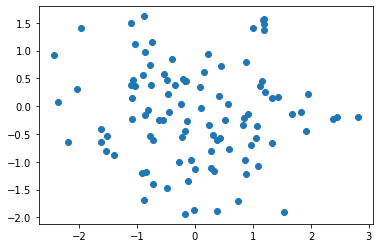

In [8]:
X = np.random.normal(0,1,100).reshape(-1,1)
y = np.random.normal(0,1,100)
plt.scatter(X,y)

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X,y)

LinearRegression()

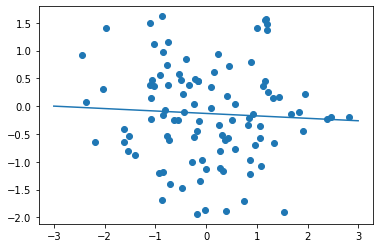

In [11]:
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="линейная регрессия")
plt.scatter(X,y)

In [12]:
# непрерывные значения которые находятся между 10 дискретными значениями будем присваивать к дискретным значениям
bins = np.linspace(-3, 3, 11)
print("категории: {}".format(bins))


категории: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [14]:
which_bin = np.digitize(X, bins=bins)
print("\nТочки данных:\n", X[:5])
print("\nКатегории для точек данных:\n", which_bin[:5])


Точки данных:
 [[ 0.33326051]
 [-0.75773238]
 [-0.23250935]
 [-0.24481707]
 [ 2.37175565]]

Категории для точек данных:
 [[6]
 [4]
 [5]
 [5]
 [9]]


In [21]:
from sklearn.preprocessing import OneHotEncoder # Для бининга непрерывных величин(дискретизация)

# преобразовываем с помощью OneHotEncoder
encoder = OneHotEncoder(sparse=False)
# encoder.fit находит уникальные значения, имеющиеся в which_bin
encoder.fit(which_bin)
# transform осуществляет прямое кодирование
X_binned = encoder.transform(which_bin)
print('Значение X до присвоения к категории: {}'.format(X[0,0])) # Ввиде непрерывной величины

print('Значение X после присвоения к категории: {}'.format(X_binned[0,])) # Ввиде дискретной величины
# Из 10 новых категорий значение 0.33 присвоилось к категории 6

Значение X до присвоения к категории: 0.3332605106364665
Значение X после присвоения к категории: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


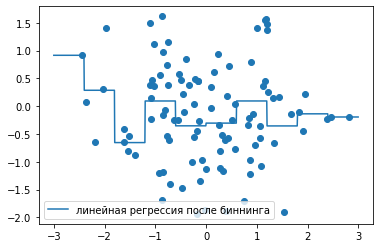

In [27]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
reg_bin = LinearRegression().fit(X_binned, y)
plt.plot(line, reg_bin.predict(line_binned), label='линейная регрессия после биннинга')
plt.scatter(X,y)
plt.legend(loc="best")

Еще один способ обогатить пространство признаков, в частности, для
линейных моделей, заключается в добавлении взаимодействий
признаков (interaction features) и полиномиальных признаков
(polynomial features). 

In [34]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)
X_combined[0,]

(100, 11)


array([0.33326051, 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        ])

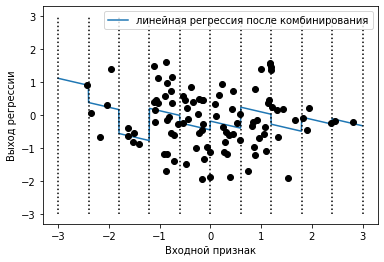

In [36]:
reg = LinearRegression().fit(X_combined, y)
line_combined = np.hstack([line, line_binned])
plt.plot(line, reg.predict(line_combined), label='линейная регрессия после комбинирования')
for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.legend(loc="best")
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.plot(X[:, 0], y, 'o', c='k')


В этом примере модель вычислила сдвиг для каждой категории, а
также наклон. Вычисленный наклон направлен вниз и он является
общим для всех категорий, так как у нас имеется толька один признак по
оси x с одним коэффициентом. Поскольку наличие одного наклона для
всех категорий не очень сильно поможет с точки зрения моделирования,
мы бы хотели вычислить для каждой категории свой собственный
наклон! Мы можем добиться этого, добавив взаимодействие или
произведение признаков, указывающее категорию точки данных и ее
расположение на оси х. Данный признак является произведением
индикатора категории и исходной переменной. Давайте создадим этот
набор данных:


In [38]:
X_product = np.hstack([X_binned, X * X_binned])
print(X_product.shape)
X_product[0,]

(100, 20)


array([0.        , 0.        , 0.        , 0.        , 0.        ,
       1.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.33326051, 0.        , 0.        , 0.        , 0.        ])

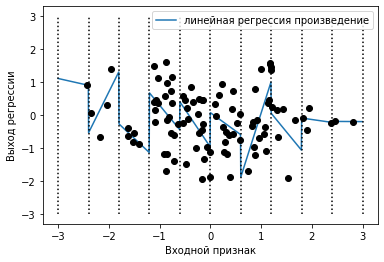

In [39]:
reg = LinearRegression().fit(X_product, y)
line_product = np.hstack([line_binned, line * line_binned])
plt.plot(line, reg.predict(line_product), label='линейная регрессия произведение')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")

# Видно, что теперь каждая категория имеет свое собственное значение
# сдвига и свое собственное значение наклона.

Использование биннинга – это способ увеличения пространства
входных признаков. Еще один способ заключается в использовании
полиномов (polynomials) исходных признаков. Для признака х мы
рассмотрим х ** 2, х ** 3, х ** 4 и так далее. Данную операцию можно
выполнить с помощью PolynomialFeatures модуля preprocessing

In [56]:
np.random.seed(0)
from sklearn.preprocessing import PolynomialFeatures
X = np.random.normal(0,1,100,).reshape(-1,1)
y = np.random.normal(0,1,100)
# задаем степень полинома 10:
# значение по умолчанию "include_bias=True" добавляет признак-константу 1
poly = PolynomialFeatures(degree=10,include_bias=False) # Будем использовать полиномы 10 степени
poly.fit(X)
X_polynom = poly.transform(X)

print(X_polynom.shape)
X_polynom[0,]


(100, 10)


array([  1.76405235,   3.11188068,   5.48952041,   9.68380136,
        17.08273251,  30.13483436,  53.15942525,  93.77600882,
       165.42578836, 291.81975004])

In [57]:
poly.get_feature_names_out()

array(['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8',
       'x0^9', 'x0^10'], dtype=object)

(-10.0, 10.0)

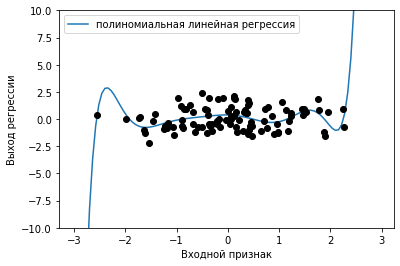

In [5]:
from sklearn.linear_model import LinearRegression
line = np.linspace(-3, 3, 100, endpoint=False).reshape(-1, 1)
reg = LinearRegression().fit(X_polynom, y)
line_poly = poly.transform(line)
plt.plot(line, reg.predict(line_poly), label='полиномиальная линейная регрессия')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Выход регрессии")
plt.xlabel("Входной признак")
plt.legend(loc="best")
plt.ylim(-10,10)


In [18]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split

boston = load_boston()

X_train,X_test,y_train,y_test = train_test_split(boston.data,boston.target,random_state=0)

X_train[0:3,0:5]

C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing da

array([[ 0.19133, 22.     ,  5.86   ,  0.     ,  0.431  ],
       [ 0.10328, 25.     ,  5.13   ,  0.     ,  0.453  ],
       [ 0.10469, 40.     ,  6.41   ,  1.     ,  0.447  ]])

In [20]:
scaler = MinMaxScaler()
X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

X_train[0:3,0:6]

array([[ 0.19133, 22.     ,  5.86   ,  0.     ,  0.431  ,  5.605  ],
       [ 0.10328, 25.     ,  5.13   ,  0.     ,  0.453  ,  5.927  ],
       [ 0.10469, 40.     ,  6.41   ,  1.     ,  0.447  ,  7.267  ]])

Теперь, мы выделим полиномиальные признаки и взаимодействия
вплоть до 2-й степени:

In [23]:
poly = PolynomialFeatures(degree=2).fit(X_train_scal)
X_train_poly = poly.transform(X_train_scal)
X_test_poly = poly.transform(X_test_scal)
print("форма обучающего массива X: {}".format(X_train.shape))
print("форма обучающего массива X полиномы и взаим: {}".format(X_train_poly.shape))


форма обучающего массива X: (379, 13)
форма обучающего массива X полиномы и взаим: (379, 105)


In [24]:
# Применим гребнеевую регрессию для переменных со взаимодействием и без

from sklearn.linear_model import Ridge

mod1 = Ridge().fit(X_train_scal,y_train)
print('правильность на данных без взаимодействия {}'.format(mod1.score(X_test_scal,y_test)))
      
mod2 = Ridge().fit(X_train_poly,y_train)
print('Правильность на данных со взаимодействием {}'.format(mod2.score(X_test_poly,y_test)))

правильность на данных без взаимодействия 0.6214583227921033
Правильность на данных со взаимодействием 0.7534782020980576


Использование нелинейных преобразований (log, exp, sin)

In [25]:
rnd = np.random.RandomState(0)
X_org = rnd.normal(size=(1000, 3))
w = rnd.normal(size=3)
X = rnd.poisson(10 * np.exp(X_org))
y = np.dot(X_org, w)

In [31]:
print("Частоты значений:\n{}".format(np.bincount(X[:, 0])))


Частоты значений:
[28 38 68 48 61 59 45 56 37 40 35 34 36 26 23 26 27 21 23 23 18 21 10  9
 17  9  7 14 12  7  3  8  4  5  5  3  4  2  4  1  1  3  2  5  3  8  2  5
  2  1  2  3  3  2  2  3  3  0  1  2  1  0  0  3  1  0  0  0  1  3  0  1
  0  2  0  1  1  0  0  0  0  1  0  0  2  2  0  1  1  0  0  0  0  1  1  0
  0  0  0  0  0  0  1  0  0  0  0  0  1  1  0  0  1  0  0  0  0  0  0  0
  1  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]


Text(0.5, 0, 'Значение')

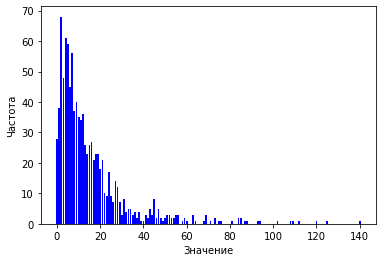

In [33]:
bins = np.bincount(X[:, 0])
plt.bar(range(len(bins)), bins, color='b')
plt.ylabel("Частота")
plt.xlabel("Значение")

Признаки X[:, 1] и X[:, 2] имеют аналогичные свойства. Полученное
распределение значений (высокая частота встречаемости маленьких
значений и низкая частота встречаемости больших значений) является
очень распространенным явлением в реальной практике. Однако для
большинства линейных моделей оно может представлять трудность.
Давайте попробуем подогнать гребневую регрессию:

In [34]:
from sklearn.linear_model import Ridge
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
score = Ridge().fit(X_train, y_train).score(X_test, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.622


Видно, что из-за относительно низкого значения R^2
гребневая
регрессия не может должным образом смоделировать взаимосвязь между
X и у. Впрочем, применение логарифмического преобразования может
помочь. Поскольку в данных появляется значение 0 (а логарифм 0 не
определен), мы не можем просто взять и применить log, вместо этого мы
должны вычислить log(X + 1):

In [35]:
X_train_log = np.log(X_train + 1)
X_test_log = np.log(X_test + 1)

Text(0.5, 0, 'Значение')

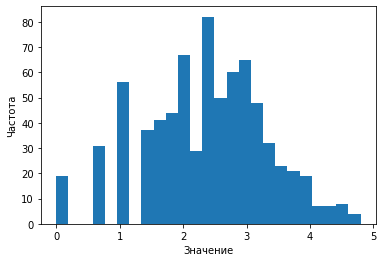

In [50]:
plt.hist(X_train_log[:,0],bins=25)
plt.ylabel("Частота")
plt.xlabel("Значение")

In [51]:
score = Ridge().fit(X_train_log, y_train).score(X_test_log, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))


Правильность на тестовом наборе: 0.875


Автоматический отбор признаков

Одномерные статистики

С помощью одномерных статистик мы определяем наличие
статистически значимой взаимосвязи между каждым признаком и
зависимой переменной. Затем отбираем признаки, сильнее всего
связанные с зависимой переменной (имеющие уровень значимости, не
превышающий заданного порогового значения). В случае классификации
эта процедура известна как дисперсионный анализ (ANOVA)

Давайте применим отбор признаков для классификационной задачи к
набору данных cancer. Чтобы немного усложнить задачу, мы добавим к
данным некоторые неинформативные шумовые признаки. Мы
предполагаем, что отбор признаков сможет определить
неинформативные признаки и удалит их

In [58]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile
from sklearn.model_selection import train_test_split
cancer = load_breast_cancer()
# задаем определенное стартовое значение для воспроизводимости результата
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# добавляем к данным шумовые признаки
# первые 30 признаков являются исходными, остальные 50 являются шумовыми
X_w_noise = np.hstack([cancer.data, noise])
X_train, X_test, y_train, y_test = train_test_split(
 X_w_noise, cancer.target, random_state=0, test_size=.5)
# используем f_classif (по умолчанию)
# и SelectPercentile, чтобы выбрать 50% признаков
select = SelectPercentile(percentile=50)
select.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select.transform(X_train)

print("форма массива X_train: {}".format(X_train.shape))
print("форма массива X_train_selected: {}".format(X_train_selected.shape))


форма массива X_train: (284, 80)
форма массива X_train_selected: (284, 40)


[ True  True  True  True  True  True  True  True  True False  True False
  True  True  True  True  True  True False False  True  True  True  True
  True  True  True  True  True  True False False False  True False  True
 False False  True False False False False  True False False  True False
 False  True False  True False False False False False False  True False
  True False False False False  True False  True False False False False
  True  True False  True False False False False]


Text(0.5, 0, 'Индекс примера')

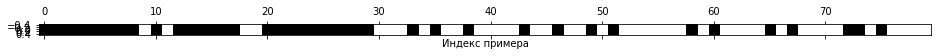

In [59]:
# Мы можем выяснить, какие функции
# были отобраны, воспользовавшись методом get_support, который
# возвращает булевы значения для каждого признака
mask = select.get_support()
print(mask)
# визуализируем булевы значения: черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")


Давайте сравним правильность
логистической регрессии с использованием всех признаков с
правильностью логистической регрессии, использующей лишь
отобранные признаки:

In [60]:
from sklearn.linear_model import LogisticRegression
# преобразовываем тестовые данные
X_test_selected = select.transform(X_test)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Правильность со всеми признаками: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Правильность только с отобранными признаками: {:.3f}".format(
 lr.score(X_test_selected, y_test)))


Правильность со всеми признаками: 0.919
Правильность только с отобранными признаками: 0.916


C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

Отбор на основе модели(модель обучается и решает какие признаки важны какие нет)

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
 RandomForestClassifier(n_estimators=100, random_state=42),
 threshold="median")

# на основе рандомного леса модель выясняет важные признаки
# отберем половину признаков (threshold = 'median')

In [61]:
select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("форма обуч набора X: {}".format(X_train.shape))
print("форма обуч набора X c l1: {}".format(X_train_l1.shape))

форма обуч набора X: (284, 80)
форма обуч набора X c l1: (284, 40)


Text(0.5, 0, 'Индекс примера')

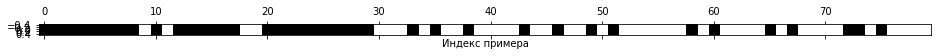

In [62]:
mask = select.get_support()
# визуализируем булевы значения -- черный – True, белый – False
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Индекс примера")


In [63]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression().fit(X_train_l1, y_train).score(X_test_l1, y_test)
print("Правильность на тестовом наборе: {:.3f}".format(score))

Правильность на тестовом наборе: 0.916


C:\python\__pycache__\envs\dsfs\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Применение экспертных знаний

In [146]:
df = pd.read_csv('C:/Users/Ильнар/citibike_aug.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1202,8/1/2015 00:00:04,8/1/2015 00:20:07,168,W 18 St & 6 Ave,40.739713,-73.994564,385,E 55 St & 2 Ave,40.757973,-73.966033,23253,Subscriber,1987.0,1
1,301,8/1/2015 00:00:05,8/1/2015 00:05:06,450,W 49 St & 8 Ave,40.762272,-73.987882,479,9 Ave & W 45 St,40.760193,-73.991255,22675,Subscriber,1951.0,2
2,431,8/1/2015 00:00:06,8/1/2015 00:07:18,312,Allen St & E Houston St,40.722055,-73.989111,296,Division St & Bowery,40.714131,-73.997047,19831,Subscriber,1985.0,1
3,273,8/1/2015 00:00:09,8/1/2015 00:04:43,382,University Pl & E 14 St,40.734927,-73.992005,229,Great Jones St,40.727434,-73.993790,22765,Subscriber,1975.0,1
4,1256,8/1/2015 00:00:17,8/1/2015 00:21:13,352,W 56 St & 6 Ave,40.763406,-73.977225,432,E 7 St & Avenue A,40.726218,-73.983799,22127,Subscriber,1978.0,1


In [147]:
df['one'] = 1
df['starttime'] = pd.to_datetime(df.starttime)

In [148]:
df_starttime = df.set_index('starttime')
df_resampled = df_starttime.resample('3h').sum().fillna(0).one
df_resampled.head()

starttime
2015-08-01 00:00:00    1135
2015-08-01 03:00:00     302
2015-08-01 06:00:00    1781
2015-08-01 09:00:00    7126
2015-08-01 12:00:00    8442
Freq: 3H, Name: one, dtype: int64

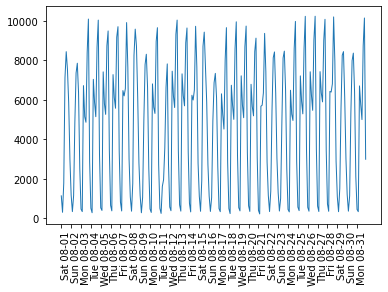

In [149]:
xticks = pd.date_range(start=df_resampled.index.min(),end=df_resampled.index.max(),freq = 'D')
plt.xticks(xticks, xticks.strftime("%a %m-%d"), rotation=90, ha="left")
plt.plot(df_resampled,linewidth=1)

In [184]:
y = df_resampled.values
X = df_resampled.index.values.astype(np.int64).reshape(-1,1)//10**9
n_train = 184

def eval_on_features(features, target, regressor):
    X_train,X_test = features[:n_train], features[n_train:]
    y_train,y_test = target[:n_train],target[n_train:]
    regressor.fit(X_train,y_train)
    print("Точность на тестовых данных {}".format(regressor.score(X_test,y_test)))
    y_pred = regressor.predict(X_test)
    y_pred_train = regressor.predict(X_train)
    plt.figure(figsize=(10, 3))
    plt.xticks(range(0, len(X), 8), xticks.strftime("%a %m-%d"), rotation=90,
                        ha="left")
    plt.plot(range(n_train), y_train, label="обуч")
    plt.plot(range(n_train, len(y_test) + n_train), y_test, '-', label="тест")
    plt.plot(range(n_train), y_pred_train, '--', label="прогноз обуч")
    plt.plot(range(n_train, len(y_test) + n_train), y_pred, '--',
    label="прогноз тест")
    plt.legend(loc=(1.01, 0))
    plt.xlabel("Дата")
    plt.ylabel("Частота проката")

Точность на тестовых данных -0.08679848138470136


<Figure size 432x288 with 0 Axes>

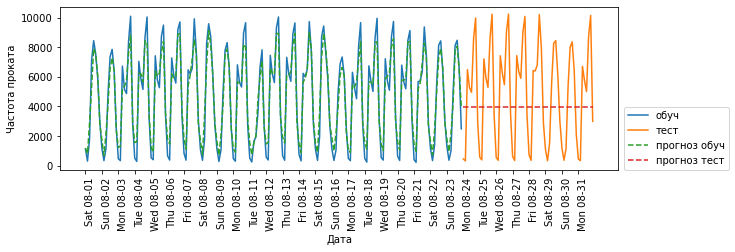

In [185]:
from sklearn.ensemble import RandomForestRegressor

clf = RandomForestRegressor(n_estimators=100,random_state=0)
plt.figure()
eval_on_features(X, y, clf)

Итак, давайте добавим
эти два признака. Мы не смогли построить модель, используя время в
формате POSIX, поэтому мы отбрасываем этот признак

Точность на тестовых данных 0.854415744037001


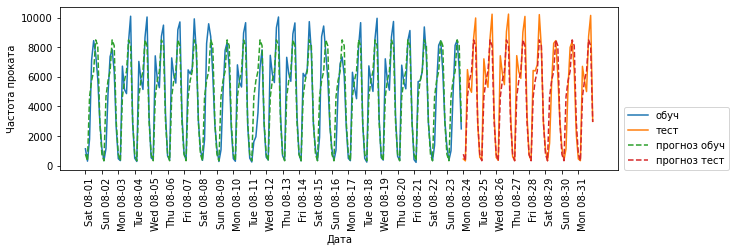

In [186]:
X_hour = np.array(df_resampled.index.hour).reshape(-1,1)
eval_on_features(X_hour,y,clf)

Значение R^2
стало уже намного лучше, но прогнозы явно не
учитывают эффект, обусловленный днем недели. Теперь давайте еще
добавим день недели

Точность на тестовых данных 0.9774183671889711


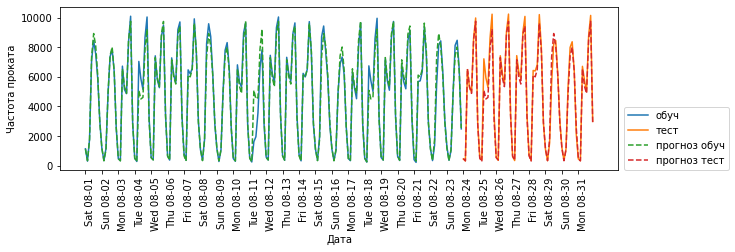

In [187]:
X_hour_week = np.hstack([np.array(df_resampled.index.hour).reshape(-1,1),
                       np.array(df_resampled.index.day_of_week).reshape(-1,1)])

X_hour_week[:10,]

eval_on_features(X_hour_week,y,clf)

Модель научилась прогнозировать среднее количество арендованных
велосипедов для каждой комбинации дня недели и времени суток на
основе выборки, включающей первые 23 дня августа. На самом деле эта
задача не требует такой сложной модели, как случайный лес, поэтому
давайте попробуем более простую модель, например, LinearRegression


Точность на тестовых данных 0.3293646292595874


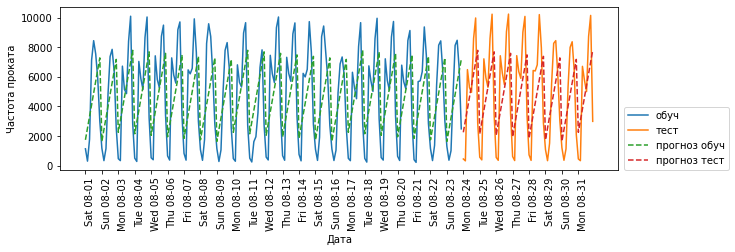

In [188]:
from sklearn.linear_model import LinearRegression
eval_on_features(X_hour_week, y, LinearRegression())


Мы можем учесть это, преобразовав признаки, закодированные
целыми числами, в дамми-переменные с помощью OneHotEncoder

Точность на тестовых данных 0.8703838793401558


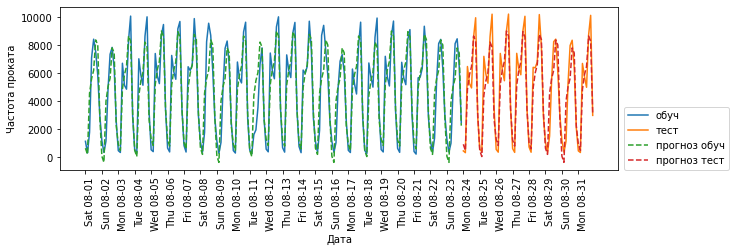

In [193]:
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()

X_hour_week_enc = enc.fit_transform(X_hour_week)

eval_on_features(X_hour_week_enc,y,LinearRegression())

Используя взаимодействия, мы можем вычислить коэффициент для
каждой комбинации дня недели и времени суток

Точность на тестовых данных 0.9781404148690872


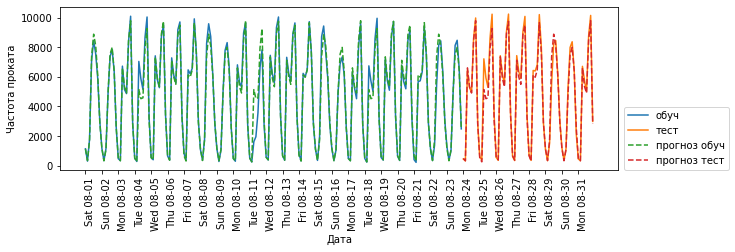

In [206]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge

poly = PolynomialFeatures(degree=2,interaction_only=True)

X_hour_week_enc_poly = poly.fit_transform(X_hour_week_enc)

lr = Ridge(alpha=0.02)

eval_on_features(X_hour_week_enc_poly,y,lr)

используя метод get_feature_names, и
сохраняем лишь те признаки, у которых коэффициенты отличны от нуля

In [211]:
hour = ["%02d:00" % i for i in range(0, 24, 3)]
day = ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
features = day + hour


In [220]:
poly_features = poly.get_feature_names(features)
features_nonzero = np.array(poly_features)[lr.coef_ != 0]
coef_nonzero = lr.coef_[lr.coef_ != 0]


Text(0, 0.5, 'Признак')

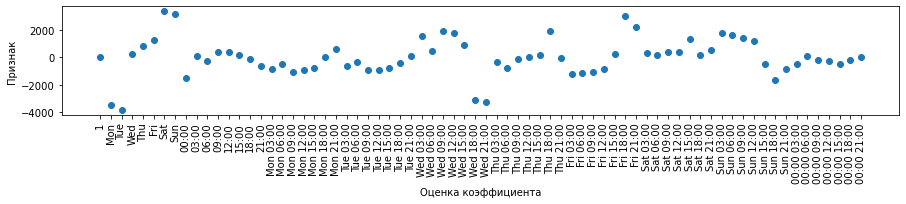

In [221]:
plt.figure(figsize=(15, 2))
plt.plot(coef_nonzero, 'o')
plt.xticks(np.arange(len(coef_nonzero)), features_nonzero, rotation=90)
plt.xlabel("Оценка коэффициента")
plt.ylabel("Признак")